In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

In [2]:
%%time 
file = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t')


Wall time: 4.13 s


In [3]:
def custom_clust(elem):
    return(elem[1])

def custom_func(elem):
    return(elem[1])

In [3]:
%%time
u_source = file['SOURCE_SUBREDDIT'].unique().tolist()
u_target = file['TARGET_SUBREDDIT'].unique().tolist()
u_source.extend(u_target)
Vertices_list = list(dict.fromkeys(u_source))
Vertices_list.sort()
print("No:of Vertices -",len(Vertices_list))

No:of Vertices - 35776
Wall time: 83.8 ms


In [4]:
#creation of edge list

In [5]:
%%time
Edges_l = list(zip(file['SOURCE_SUBREDDIT'],file['TARGET_SUBREDDIT']))
Edges_l.sort()
Edges_list = list(dict.fromkeys(Edges_l))
print("No:of Unique Edges -",len(Edges_list))

No:of Unique Edges - 137821
Wall time: 588 ms


In [6]:
# Creation of adjacency matrix and adj list

In [7]:
%%time

V = len(Vertices_list)

Adj_Mat = np.zeros((V,V),dtype=int)

# Adj_list = []
# for s in range(V):
#     Adj_list.append([])

for i in Edges_list:
    a = Vertices_list.index(i[0])
    b = Vertices_list.index(i[1])
    Adj_Mat[a][b]=1
#     Adj_list[a].append(i[1])


Wall time: 1min 33s


In [8]:
# Creation of adjacency list 
#to check wall time for adjacency list 

In [9]:
%%time
# V = len(Vertices_list)

# Adj_Mat = np.zeros((V,V),dtype=int)

Adj_list = []
for s in range(V):
    Adj_list.append([])

for i in Edges_list:
    a = Vertices_list.index(i[0])
    b = Vertices_list.index(i[1])
#     Adj_Mat[a][b]=1
    Adj_list[a].append(i[1])


Wall time: 1min 33s


In [12]:
# Stroing Adj matrix and Adj list as csv

In [13]:
# np.savetxt('Adjacency_Matrix.csv',Adj_Mat,delimiter = ',')
# np.savetxt('Adjacency_list.csv',Adj_list,delimiter = ',')

In [14]:
                    # Insight 1

In [15]:
# (1-1) Nodes from which many outward nodes are connected
# using adjacency matrix/adjacency list
# rowcount in adj_mat / length of a sub-list in edge list

In [16]:
%%time

#wall time using adjacency list

count_vertex = 0    
count = []
outdegree_sub = {}
for i in range(len(Adj_list)):
    count_vertex = len(Adj_list[i])
    a = [Vertices_list[i],count_vertex]
    count.append(a)
    outdegree_sub[Vertices_list[i]] = Adj_list[i]
# outdegree_sub

Wall time: 85.8 ms


In [17]:
%%time

# wall time using adjacency matrix

count = []
for i in range(len(Adj_Mat)):
    count_vertex = Adj_Mat[i].sum()
#     print(count_vertex)
    a = [Vertices_list[i],count_vertex]
    count.append(a)


Wall time: 23 s


In [18]:
# count
# outdegree_sub

In [19]:
count.sort(key=custom_func,reverse=True)
count
count1 = count[:20]
popularName = [x[0] for x in count1]
popularNo = [x[1] for x in count1]
y_pos = np.arange(len(popularName))

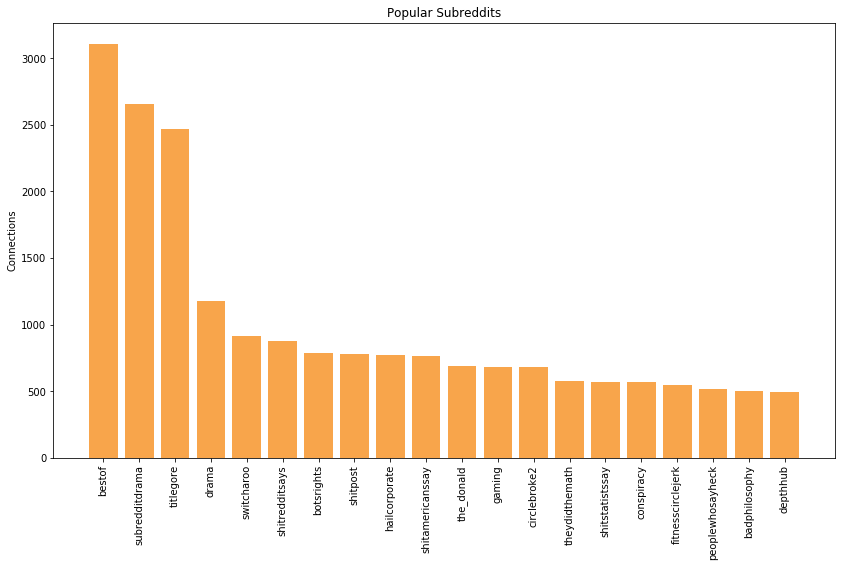

In [20]:
plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, popularNo, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, popularName,rotation='vertical')
plt.ylabel('Connections')
plt.title('Popular Subreddits')
plt.show()
# plt.savefig("Popular_subreddits",dpi=500)

In [21]:
# Insight - 2 

In [22]:
# popular among popular connections
popularName1 = []
commonCount = []
commonName = []
for s in popularName:
    common_sub = list(set(outdegree_sub[s]) & set(popularName))
    popularName1.append(s)
    commonCount.append(len(common_sub))
    commonName.append((common_sub))
    
print(popularName1)

['bestof', 'subredditdrama', 'titlegore', 'drama', 'switcharoo', 'shitredditsays', 'botsrights', 'shitpost', 'hailcorporate', 'shitamericanssay', 'the_donald', 'gaming', 'circlebroke2', 'theydidthemath', 'shitstatistssay', 'conspiracy', 'fitnesscirclejerk', 'peoplewhosayheck', 'badphilosophy', 'depthhub']


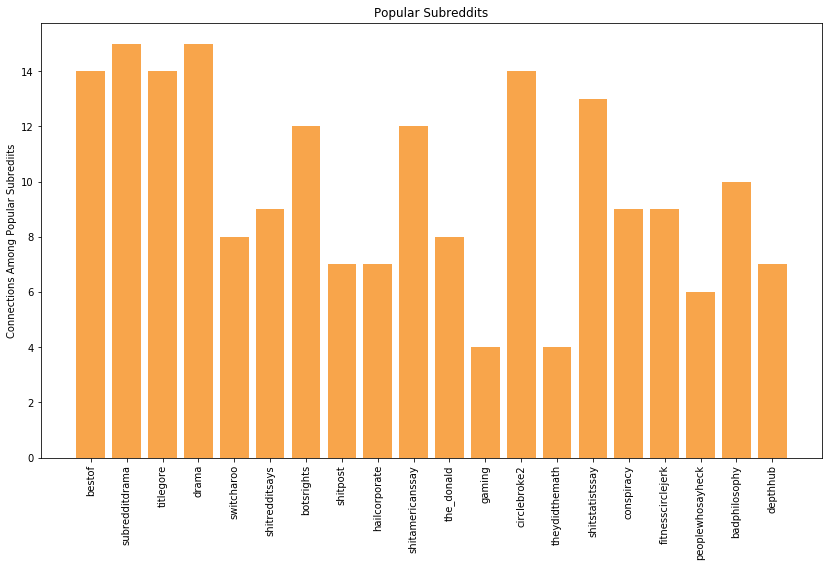

In [23]:
y_pos = np.arange(len(popularName1))
plt.rcParams["figure.figsize"] =  [14, 8]
plt.bar(y_pos, commonCount, align='center', alpha=0.8,color='#F78F1E')
plt.xticks(y_pos, popularName1,rotation='vertical')
plt.ylabel('Connections Among Popular Subrediits')
plt.title('Popular Subreddits')
plt.show()
# plt.savefig("Popular_subreddits",dpi=500)

In [24]:
# d3 chord diagram

In [25]:
d3matrix = []
d3matrix = np.zeros((len(popularName1),len(popularName1)),dtype=int)
matrix_index = 0
for name in commonName:
    for name1 in name:
        a = popularName1.index(name1)
        d3matrix[matrix_index][a] = 1
#         print(a)
    matrix_index = matrix_index+1


In [26]:
d3matrix

array([[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 1,

In [27]:
# popularName1

In [28]:
%%time

# wall time using adjacency matrix

count = []
for i in range(len(Adj_Mat)):
    count_vertex = Adj_Mat[i].sum()
#     print(count_vertex)
    a = [Vertices_list[i],count_vertex]
    count.append(a)


Wall time: 26.1 s


In [29]:

x = []
y = []
for i in range(20):
    x.append(count[i][0])
    y.append(count[i][1])    

# plt.figure(figsize=(12,8))
# plt.barh(x,y)
# plt.title("top 20 popuplar sub-reddits")

In [30]:
# sub_ADJ_MAT_ind = []
# for i in range(len(x)):
#     sub_ADJ_MAT_ind.append(Vertices_list.index(x[i]))

# sub_ADJ_MAT_ind.sort()
# Adj_Mat[sub_ADJ_MAT_ind]

In [31]:
# (1-2) Nodes to which many nodes are connected (inward connecteions)
#  using adjacency matrix
# Col_count in adj_mat 

In [32]:
%%time 

x1   = []
y1   = []
count_col = Adj_Mat.sum(axis=0)
Col_list = count_col.tolist()
Col_list_dup = count_col.tolist()

for i in range(20):
    mx = max(Col_list)   
    
    indd = Col_list_dup.index(mx)
    
    y1.append(mx)
    x1.append(Vertices_list[indd])
    Col_list.remove(mx)


Wall time: 27.6 s


Text(0.5, 1.0, 'top 20 popuplar sub-reddits')

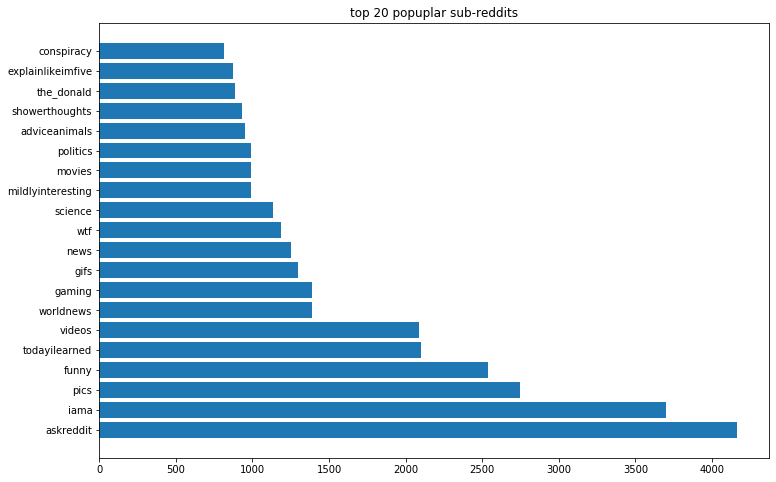

In [33]:
plt.figure(figsize=(12,8))
plt.barh(x1,y1)
plt.title("top 20 popuplar sub-reddits")

In [35]:
%%time
sub_ADJ_MAT_ind_1 = []
for i in range(len(x1)):
    sub_ADJ_MAT_ind_1.append(Vertices_list.index(x1[i]))

sub_ADJ_MAT_ind_1.sort()
Adj_Mat[:,sub_ADJ_MAT_ind_1]
# outdegree_sub

Wall time: 5.06 s


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
                    # insight 2

In [37]:
# (2-1) how long a path takes to encounter its first cycle
# avg path length for all the paths

In [38]:

def Vertices(node):
    for i in range(len(Vertices_list)):
        if node == Vertices_list[i]:
#             print(i)
            return i

def Matrix(index):
    for i in range(len(Adj_Mat[index])):
        if Adj_Mat[index][i]==1:
#             print(Vertices_list[i])
            return Vertices_list[i]


In [39]:
                    # insight 3

In [40]:
# (3-1)Categorizing link sentiments of popular subreddits

In [41]:
link_sent_popular_nodes = []
for i in range(len(x)):
    df = file[file['SOURCE_SUBREDDIT']==x[i]]
    link_sent_popular_nodes.append(df.LINK_SENTIMENT.tolist())

In [45]:
# link_sent_popular_nodes

In [42]:
from collections import Counter

In [55]:
count_link_sent = []
pos = []
neg = []
for i in range(len(link_sent_popular_nodes)):
    link_sent_popular_nodes[i].sort()
    c = Counter(link_sent_popular_nodes[i])
    count_link_sent.append(list(c.values()))
    print(c.values())
    if len(list(c.values())) == 1:
        if (list(c.keys()))[0] == -1:
            pos.append(('0'))
            neg.append((list(c.values()))[0])
        if (list(c.keys()))[0] == 1:
            pos.append((list(c.values()))[0])
            neg.append(('0'))
    if len(list(c.values())) == 2:
        pos.append((list(c.values()))[1])
        neg.append((list(c.values()))[0])

dict_values([1])
dict_values([1])
dict_values([])
dict_values([1])
dict_values([1])
dict_values([2])
dict_values([1])
dict_values([1])
dict_values([])
dict_values([3])
dict_values([])
dict_values([])
dict_values([3])
dict_values([1])
dict_values([1])
dict_values([])
dict_values([45])
dict_values([3])
dict_values([])
dict_values([])


In [58]:
print(len(pos))
print(len(neg))

13
13


ValueError: shape mismatch: objects cannot be broadcast to a single shape

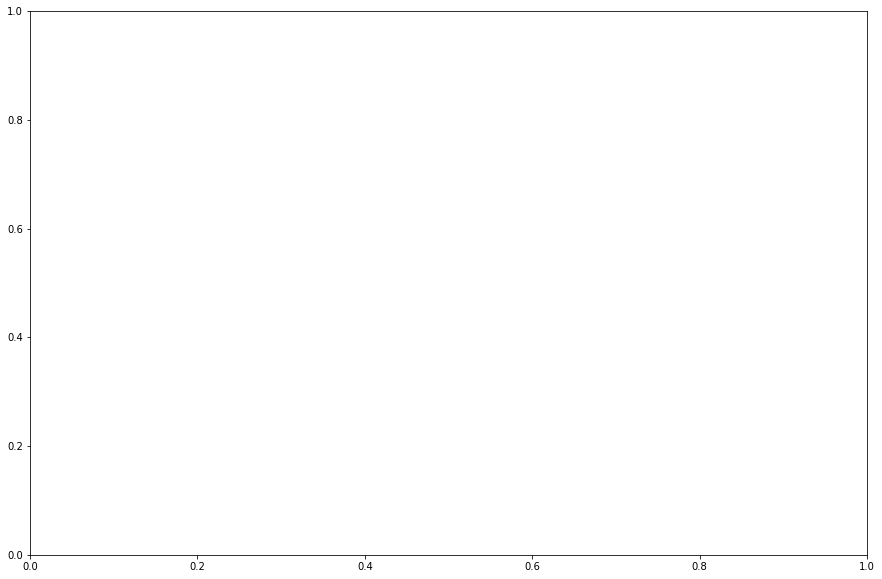

In [56]:

width = 0.75
s1 = np.arange(20)

plt.figure(figsize=(15,10))

p1 = plt.barh(s1,pos, width)
p2 = plt.barh(s1,neg, width)

plt.ylabel('top 20 popular sub-reddits')
plt.xlabel('total #edges from the node')
plt.title('Number of Positive and Negative link Sentiments on the outward edges of top 20 popular subreddits')

plt.yticks(s1, x)
plt.xticks(np.arange(0, 18001, 1000))
plt.legend((p1[0], p2[0]), ('positive', 'negative'))

plt.show()

In [ ]:
#(3-2) 

In [ ]:
link_sent_popular_nodes_1 = []
for i in range(len(x1)):
    df1 = file[file['TARGET_SUBREDDIT']==x1[i]]
    link_sent_popular_nodes_1.append(df1.LINK_SENTIMENT.tolist())

In [ ]:
count_link_sent_1 = []
pos_1 = []
neg_1 = []
for i in range(len(link_sent_popular_nodes_1)):
    link_sent_popular_nodes_1[i].sort()
    c = Counter(link_sent_popular_nodes_1[i])
    count_link_sent_1.append(list(c.values()))
    pos_1.append(list(c.values())[1])
    neg_1.append(list(c.values())[0])

In [ ]:

s1_1 = np.arange(20)

plt.figure(figsize=(15,10))

p1_1 = plt.barh(s1_1,pos_1, width)
p2_1 = plt.barh(s1_1,neg_1, width)

plt.ylabel('top 20 popular sub-reddits')
plt.xlabel('total #edges from the node')
plt.title('Number of Positive and Negative link Sentiments on the outward edges of top 20 popular subreddits')

plt.yticks(s1_1, x1)
plt.xticks(np.arange(0, 17001, 1000))
plt.legend((p1_1[0], p2_1[0]), ('positive', 'negative'))

plt.show()

In [ ]:
                    #insight 5

In [67]:
%%time
body  = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t')
title = pd.read_csv('soc-redditHyperlinks-title.tsv', delimiter='\t')

body_src_list  = body['SOURCE_SUBREDDIT'].unique().tolist()
body_trg_list  = body['TARGET_SUBREDDIT'].unique().tolist()

body_src_list.extend(body_trg_list)
body_list = list(dict.fromkeys(body_src_list))

title_src_list = title['SOURCE_SUBREDDIT'].unique().tolist()
title_trg_list = title['TARGET_SUBREDDIT'].unique().tolist()

title_src_list.extend(title_trg_list)
title_list = list(dict.fromkeys(title_src_list))

only_body  = list(set(body_list).difference(title_list))
only_title = list(set(title_list).difference(body_list))

all_V = 55863

print("#Nodes which can be visited only through body of the subreddit  :", len(only_body))
print("#Nodes which can be visited only through title of the subreddit :", len(only_title))
cnt =  all_V - int((len(only_body)+len(only_title)))
print("#Nodes which can be visited by body and title :", cnt)


#Nodes which can be visited only through body of the subreddit  : 13105
#Nodes which can be visited only through title of the subreddit : 31404
#Nodes which can be visited by body and title : 11354
Wall time: 8.79 s


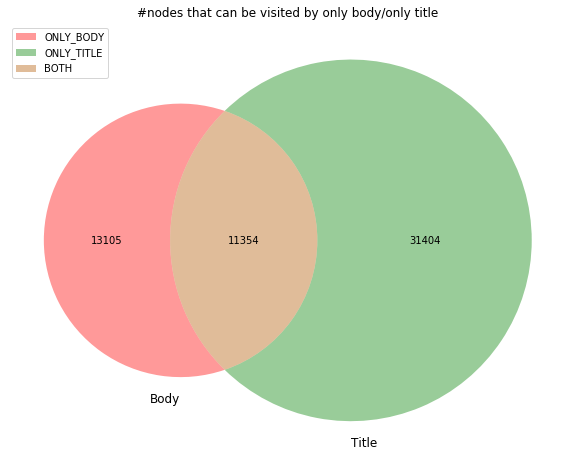

In [68]:
# First way to call the 2 group Venn diagram:
venn2(subsets = (len(only_body), len(only_title), cnt), set_labels = ('Body', 'Title'))
ax = plt.gca()
ax.legend(labels=['ONLY_BODY','ONLY_TITLE','BOTH'], title="")
plt.title("#nodes that can be visited by only body/only title")
plt.show()

In [ ]:
                    #insight 5

In [ ]:
# (4-1) #nodes in path before forming a cycle in the path
# also calculating the avg path length until cycle 
# a subreddit needs  #avg new nodes to be visited to...... (form a cycle)

In [ ]:
%%time 
path_length = []
for node in origin_nodes:
    src = node
    path = []
    trg = ''
    path.append(src)
    exists=True

    while exists:
        index = Vertices_list.index(src)
        if len(Adj_list[index])>0:
            trg   = Adj_list[index][0]  
            for element in path:
                if element == trg:                    
#                     check for next adjacent node
                    trg = Adj_list[index][0]  
                    exists = False
                
            if exists:
                path.append(trg)
                src = trg
        else:
            exists=False
    path_length.append(len(path))

In [ ]:
avg = 0
sum = 0
for i in range(len(path_length)):
    sum += path_length[i]
avg = int(sum/(i+1))
print("average path length of a path until a cycle is encountered :", avg)